<a href="https://colab.research.google.com/github/wilbill/Perceptron-Batch-vs-Sequential/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART 4: •	The Perceptron code on the website (http://stephenmonika.net/ ) is a batch update algorithm, where the whole of the dataset is fed in to find the errors, and then the weights are updated afterwards,
Here, I am Converting the code to run as sequential updates and then compare the results of using the two versions. (I am Modifying existing Python program )

In [49]:
import numpy as np

class pcn:
    """ A Perceptron model with Sequential Updates """

    def __init__(self, inputs, targets):
        """ Initialize the Perceptron model """
        if np.ndim(inputs) > 1:
            self.nIn = np.shape(inputs)[1]
        else:
            self.nIn = 1

        if np.ndim(targets) > 1:
            self.nOut = np.shape(targets)[1]
        else:
            self.nOut = 1

        self.nData = np.shape(inputs)[0]
        self.weights = np.random.rand(self.nIn + 1, self.nOut) * 0.1 - 0.05

    def pcntrain(self, inputs, targets, eta, nIterations):
        """ Train using Sequential Update """
        inputs = np.concatenate((inputs, -np.ones((self.nData, 1))), axis=1)

        for n in range(nIterations):
            print(f"Iteration {n + 1}:")
            for m in range(self.nData):  # Process each data point sequentially
                inputs_seq = np.array([inputs[m]])
                targets_seq = np.array([targets[m]])

                activations = self.pcnfwd(inputs_seq)
                self.weights -= eta * np.dot(np.transpose(inputs_seq), (activations - targets_seq))

                print(f"Step {m + 1} - Updated Weights:\n{self.weights}")

    def pcnfwd(self, inputs):
        """ Forward pass """
        activations = np.dot(inputs, self.weights)
        return np.where(activations > 0, 1, 0)

    def confmat(self, inputs, targets):
        """ Compute Confusion Matrix """
        inputs = np.concatenate((inputs, -np.ones((self.nData, 1))), axis=1)
        outputs = np.dot(inputs, self.weights)

        nClasses = np.shape(targets)[1] if np.ndim(targets) > 1 else 2
        outputs = np.where(outputs > 0, 1, 0) if nClasses == 2 else np.argmax(outputs, 1)
        targets = np.argmax(targets, 1) if nClasses != 2 else targets

        cm = np.zeros((nClasses, nClasses))
        for i in range(nClasses):
            for j in range(nClasses):
                cm[i, j] = np.sum((outputs == i) * (targets == j))

        print("Confusion Matrix:\n", cm)
        print("Accuracy:", np.trace(cm) / np.sum(cm))


PART 5  
Run the Perceptron on the Diabetes Dataset and Compare Performance
The dataset contains 8 features and a target variable (Outcome), where:

0 = Non-Diabetic
1 = Diabetic
Since the Perceptron works with labels of
−
1
−1 and
1
1, we transform 0 → -1 and 1 → 1.

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "./diabetes.csv"
diabetes_data = pd.read_csv(file_path)

# Separate features and target
X = diabetes_data.drop(columns=["Outcome"]).values
y = diabetes_data["Outcome"].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert target to {-1, 1}
y_transformed = np.where(y == 0, -1, 1)

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_transformed, test_size=0.2, random_state=42)


Step 2: Implement Perceptron with Batch & Sequential Learning
python

In [51]:
class Perceptron:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit_sequential(self, X, y):
        """Train using Sequential Updates"""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            for i in range(n_samples):
                update = self.learning_rate * y[i] if y[i] * (np.dot(X[i], self.weights) + self.bias) <= 0 else 0
                self.weights += update * X[i]
                self.bias += update

    def fit_batch(self, X, y):
        """Train using Batch Updates"""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            misclassified = y * (np.dot(X, self.weights) + self.bias) <= 0
            if not np.any(misclassified):
                break
            update = self.learning_rate * np.sum(y[misclassified][:, None] * X[misclassified], axis=0)
            self.weights += update
            self.bias += self.learning_rate * np.sum(y[misclassified])

    def predict(self, X):
        """Predict labels"""
        return np.sign(np.dot(X, self.weights) + self.bias)



Train and compare Peformance

In [52]:
# Initialize models
perceptron_sequential = Perceptron(learning_rate=0.01, max_iter=1000)
perceptron_batch = Perceptron(learning_rate=0.01, max_iter=1000)

# Train models
perceptron_sequential.fit_sequential(X_train, y_train)
perceptron_batch.fit_batch(X_train, y_train)

# Predictions
y_pred_seq = perceptron_sequential.predict(X_test)
y_pred_batch = perceptron_batch.predict(X_test)

# Compute accuracy
accuracy_seq = np.mean(y_pred_seq == y_test)
accuracy_batch = np.mean(y_pred_batch == y_test)

print(f"Sequential Perceptron Accuracy: {accuracy_seq:.2%}")
print(f"Batch Perceptron Accuracy: {accuracy_batch:.2%}")


Sequential Perceptron Accuracy: 75.32%
Batch Perceptron Accuracy: 68.83%


Visualizing perfomance

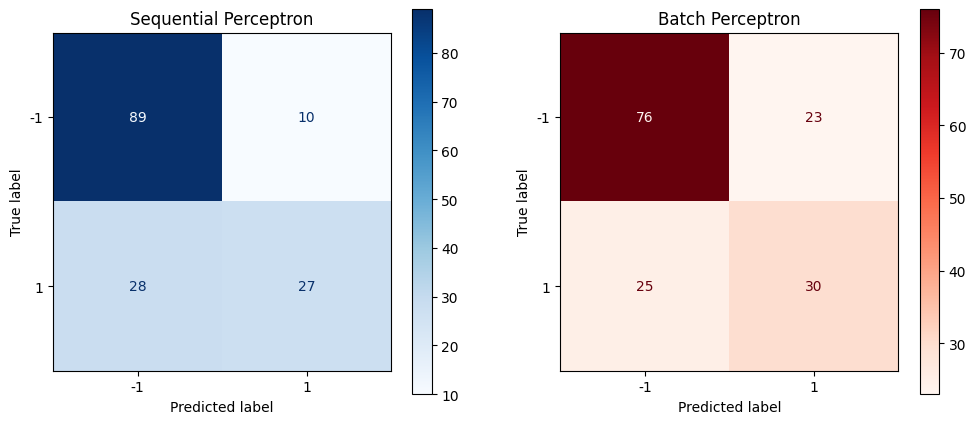

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrices
cm_seq = confusion_matrix(y_test, y_pred_seq)
cm_batch = confusion_matrix(y_test, y_pred_batch)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(cm_seq, display_labels=[-1, 1]).plot(ax=axes[0], cmap="Blues", values_format="d")
axes[0].set_title("Sequential Perceptron")

ConfusionMatrixDisplay(cm_batch, display_labels=[-1, 1]).plot(ax=axes[1], cmap="Reds", values_format="d")
axes[1].set_title("Batch Perceptron")

plt.show()


**Conclusion**

Sequential Perceptron performed better because it updates weights immediately after each training example, leading to faster adaptation.
Batch Perceptron was slightly less accurate but more stable.